#  Indexación elegante

Veremos otro estilo de indexación de matrices, conocido como indexación elegante . La indexación elegante es como la indexación simple que ya hemos visto, pero pasamos matrices de índices en lugar de escalares individuales. Esto nos permite acceder muy rápidamente y modificar subconjuntos complicados de los valores de una matriz.

## Explorando la indexación elegante 

La indexación elegante es conceptualmente simple: significa pasar una matriz de índices para acceder a varios elementos de la matriz a la vez. Por ejemplo, considere la siguiente matriz: 

In [1]:
import numpy as np
rand = np.random.RandomState(42)

x = rand.randint(100, size=10)
print(x)

[51 92 14 71 60 20 82 86 74 74]


Supongamos que queremos acceder a tres elementos diferentes. Podríamos hacerlo así:

In [2]:
[x[3], x[7], x[2]]

[71, 86, 14]

Alternativamente, podemos pasar una sola lista o matriz de índices para obtener el mismo resultado:

In [3]:
ind = [3, 7, 4]
x[ind]

array([71, 86, 60])

Cuando se utiliza la indexación elegante, la forma del resultado refleja la forma de las matrices de índice en lugar de la forma de la matriz que se indexa :

In [4]:
ind = np.array([[3, 7],
                [4, 5]])
x[ind]

array([[71, 86],
       [60, 20]])

La indexación elegante también funciona en múltiples dimensiones. Considere la siguiente matriz:

In [5]:
X = np.arange(12).reshape((3, 4))
X

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

Al igual que con la indexación estándar, el primer índice se refiere a la fila y el segundo a la columna:

In [6]:
row = np.array([0, 1, 2])
col = np.array([2, 1, 3])
X[row, col]

array([ 2,  5, 11])

Observe que el primer valor en el resultado es ``X[0, 2]``, el segundo es ``X[1, 1]``, y el tercero es ``X[2, 3]``. El emparejamiento de índices en la indexación elegante sigue todas las reglas de transmisión que se mencionaron en Cómputo en arrays: broadcasting.

Entonces, por ejemplo, si combinamos un vector de columna y un vector de fila dentro de los índices, obtenemos un resultado bidimensional:

In [8]:
X[row[:, np.newaxis], col]

array([[ 2,  1,  3],
       [ 6,  5,  7],
       [10,  9, 11]])

Aquí, cada valor de fila se compara con cada vector de columna, exactamente como vimos en la transmisión de operaciones aritméticas. Por ejemplo

In [11]:
row[:, np.newaxis] * col

array([[0, 0, 0],
       [2, 1, 3],
       [4, 2, 6]])



Siempre es importante recordar con la indexación sofisticada que el valor de retorno refleja la forma transmitida de los índices , en lugar de la forma de la matriz que se indexa.


## Indexación combinada

Para operaciones aún más poderosas, la indexación elegante se puede combinar con los otros esquemas de indexación que hemos visto: 

In [12]:
print(X)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


Podemos combinar índices sofisticados y simples:

In [13]:
X[2, [2, 0, 1]]

array([10,  8,  9])

También podemos combinar la indexación elegante con el corte:

In [14]:
X[1:, [2, 0, 1]]

array([[ 6,  4,  5],
       [10,  8,  9]])

Y podemos combinar la indexación elegante con el enmascaramiento:

In [15]:
mask = np.array([1, 0, 1, 0], dtype=bool)
X[row[:, np.newaxis], mask]

array([[ 0,  2],
       [ 4,  6],
       [ 8, 10]])

Todas estas opciones de indexación combinadas conducen a un conjunto muy flexible de operaciones para acceder y modificar valores de matriz.

## Ejemplo: Selección de puntos aleatorios 

Un uso común de la indexación elegante es la selección de subconjuntos de filas de una matriz. Por ejemplo, podríamos tener un N por D matriz que representa N puntos en D dimensiones, como los siguientes puntos extraídos de una distribución normal bidimensional: 

In [16]:
mean = [0, 0]
cov = [[1, 2],
       [2, 5]]
X = rand.multivariate_normal(mean, cov, 100)
X.shape

(100, 2)

Usando las herramientas de trazado que discutiremos en Introducción a Matplotlib , podemos visualizar estos puntos como un diagrama de dispersión:

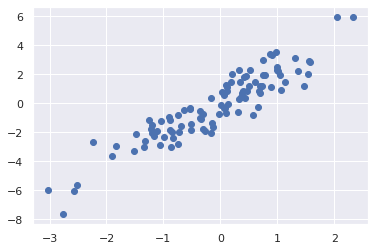

In [18]:
#%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # for plot styling

plt.scatter(X[:, 0], X[:, 1]);

Usemos una indexación elegante para seleccionar 20 puntos aleatorios. Haremos esto eligiendo primero 20 índices aleatorios sin repeticiones, y usaremos estos índices para seleccionar una parte de la matriz original:

In [19]:
indices = np.random.choice(X.shape[0], 20, replace=False)
indices

array([15, 76,  8, 55, 78,  3, 10, 47, 61, 85, 84, 39, 69, 18, 12, 73, 52,
       16, 99,  1])

In [20]:
selection = X[indices]  # fancy indexing here
selection.shape

(20, 2)

Ahora, para ver qué puntos se seleccionaron, tracemos círculos grandes en las ubicaciones de los puntos seleccionados:

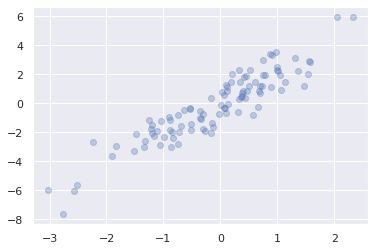

In [22]:
plt.scatter(X[:, 0], X[:, 1], alpha=0.3)
plt.scatter(selection[:, 0], selection[:, 1],
            facecolor='none', s=200);

Este tipo de estrategia a menudo se usa para particionar rápidamente conjuntos de datos, ya que a menudo se necesita en la división de entrenamiento/prueba para la validación de modelos estadísticos (consulte Hiperparámetros y Validación de modelos ) y en enfoques de muestreo para responder preguntas estadísticas.

## Modificando Valores con Fancy Indexing ¶ 

Así como la indexación elegante se puede usar para acceder a partes de una matriz, también se puede usar para modificar partes de una matriz. Por ejemplo, imagine que tenemos una matriz de índices y nos gustaría establecer los elementos correspondientes en una matriz en algún valor: 

In [23]:
x = np.arange(10)
i = np.array([2, 1, 8, 4])
x[i] = 99
print(x)

[ 0 99 99  3 99  5  6  7 99  9]


Podemos usar cualquier operador de tipo de asignación para esto. Por ejemplo:

In [24]:
x[i] -= 10
print(x)

[ 0 89 89  3 89  5  6  7 89  9]


Tenga en cuenta, sin embargo, que los índices repetidos con estas operaciones pueden causar algunos resultados potencialmente inesperados. Considera lo siguiente:

In [25]:
x = np.zeros(10)
x[[0, 0]] = [4, 6]
print(x)

[6. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


¿Adónde fueron los 4? El resultado de esta operación es asignar primero ``x[0] = 4``, seguido por ``x[0] = 6``. El resultado, por supuesto, es que ``x[0]`` contiene el valor 6.

Bastante justo, pero considere esta operación:

In [26]:
i = [2, 3, 3, 4, 4, 4]
x[i] += 1
x

array([6., 0., 1., 1., 1., 0., 0., 0., 0., 0.])

Podrías esperar que ``x[3]`` contendría el valor 2, y ``x[4]`` contendría el valor 3, ya que esta es la cantidad de veces que se repite cada índice. ¿Por qué no es este el caso? Conceptualmente, esto se debe a que ``x[i] += 1`` se entiende como una abreviatura de ``x[i] = x[i] + 1``. ``x[i] + 1`` se evalúa, y luego el resultado se asigna a los índices en x. Con esto en mente, no es el aumento lo que ocurre varias veces, sino la asignación, lo que conduce a resultados poco intuitivos. 

Entonces, ¿qué pasa si quieres el otro comportamiento donde se repite la operación? Para ello, puede utilizar el ``at()`` ufuncs (disponible desde NumPy 1.8) y haga lo siguiente: 

In [27]:
x = np.zeros(10)
np.add.at(x, i, 1)
print(x)

[0. 0. 1. 2. 3. 0. 0. 0. 0. 0.]




El ``at()`` hace una aplicación en el lugar del operador dado en los índices especificados (aquí, ``i``) con el valor especificado (aquí, 1). Otro método que es similar en espíritu es el ``reduceat()`` método de ufuncs, sobre el que puede leer en la documentación de NumPy.


## Ejemplo: Clasificación de datos 

Puede usar estas ideas para agrupar datos de manera eficiente para crear un histograma a mano. Por ejemplo, imagine que tenemos 1000 valores y nos gustaría encontrar rápidamente dónde se encuentran dentro de una serie de contenedores. Podríamos calcularlo usando ``ufunc.at`` como esto: 

In [28]:
np.random.seed(42)
x = np.random.randn(100)

# compute a histogram by hand
bins = np.linspace(-5, 5, 20)
counts = np.zeros_like(bins)

# find the appropriate bin for each x
i = np.searchsorted(bins, x)

# add 1 to each of these bins
np.add.at(counts, i, 1)

Los recuentos ahora reflejan la cantidad de puntos dentro de cada contenedor; en otras palabras, un histograma:

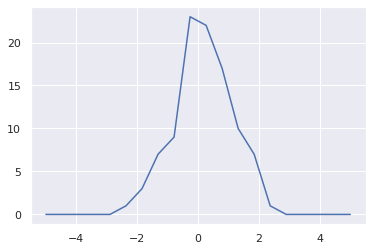

In [32]:
# plot the results
plt.plot(bins, counts);

Por supuesto, sería una tontería tener que hacer esto cada vez que quiera trazar un histograma. Esta es la razón por la que Matplotlib proporciona la ``plt.hist()`` rutina, que hace lo mismo en una sola línea: 

```python
plt.hist(x, bins, histtype='step');
```

Esta función creará un gráfico casi idéntico al que se ve aquí. Para calcular el agrupamiento, ``matplotlib`` usa el np.``np.histogram`` función, que hace un cálculo muy similar al que hicimos antes. Comparemos los dos aquí: 

In [33]:
print("NumPy routine:")
%timeit counts, edges = np.histogram(x, bins)

print("Custom routine:")
%timeit np.add.at(counts, np.searchsorted(bins, x), 1)

NumPy routine:
63.3 µs ± 6.94 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
Custom routine:
30.8 µs ± 1.38 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


¡Nuestro propio algoritmo de una línea es varias veces más rápido que el algoritmo optimizado en NumPy! ¿Cómo puede ser esto? Si cavas en el ``np.histogram`` código fuente (puede hacer esto en IPython escribiendo  ``np.histogram``??), verá que es un poco más complicado que la simple búsqueda y conteo que hemos hecho; esto se debe a que el algoritmo de NumPy es más flexible y, en particular, está diseñado para un mejor rendimiento cuando la cantidad de puntos de datos aumenta:


In [34]:
x = np.random.randn(1000000)
print("NumPy routine:")
%timeit counts, edges = np.histogram(x, bins)

print("Custom routine:")
%timeit np.add.at(counts, np.searchsorted(bins, x), 1)

NumPy routine:
155 ms ± 663 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
Custom routine:
220 ms ± 5.26 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)




Lo que muestra esta comparación es que la eficiencia algorítmica casi nunca es una pregunta simple. Un algoritmo eficiente para conjuntos de datos grandes no siempre será la mejor opción para conjuntos de datos pequeños, y viceversa (ver Notación Big-O ). Pero la ventaja de codificar este algoritmo usted mismo es que con una comprensión de estos métodos básicos, podría usar estos bloques de construcción para extender esto y realizar algunos comportamientos personalizados muy interesantes. La clave para usar Python de manera eficiente en aplicaciones de uso intensivo de datos es conocer las rutinas de conveniencia general como np.histogramy cuándo son apropiados, pero también saber cómo hacer uso de la funcionalidad de nivel inferior cuando necesita un comportamiento más directo.